In [20]:
# start imagic code, our approach for v0
import requests
from PIL import Image
from io import BytesIO
import torch
import os
from diffusers import DiffusionPipeline, DDIMScheduler
from IPython.display import Image as Image_dis

In [ ]:
has_cuda = torch.cuda.is_available()
device = torch.device('cpu' if not has_cuda else 'cuda')
pipe = DiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4",
        safety_checker=None,
    use_auth_token=True,
    custom_pipeline="imagic_stable_diffusion",
    scheduler = DDIMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", clip_sample=False, set_alpha_to_one=False)
).to(device)
generator = torch.Generator("cuda").manual_seed(0)
seed = 0

In [ ]:
prompt = "A photo of Barack Obama smiling with a big grin"
url = 'https://www.dropbox.com/s/6tlwzr73jd1r9yk/obama.png?dl=1'
response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((512, 512))

In [2]:
res = pipe.train(
        prompt,
        image=init_image,
        generator=generator)

Keyword arguments {'truncaton': True} not recognized.
Steps: 100%|████████████████████████████████████████████████████████████████████████████| 500/500 [01:13<00:00,  6.76it/s, loss=0.178]

100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:16<00:00,  3.89it/s, loss=0.00662]


In [3]:
res = pipe(alpha=1, guidance_scale=7.5, num_inference_steps=50)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 10.09it/s]


In [4]:
os.makedirs("imagic", exist_ok=True)
image = res.images[0]
image.save('./imagic/imagic_image_alpha_1.png')
res = pipe(alpha=1.5, guidance_scale=7.5, num_inference_steps=50)
image = res.images[0]
image.save('./imagic/imagic_image_alpha_1_5.png')
res = pipe(alpha=2, guidance_scale=7.5, num_inference_steps=50)
image = res.images[0]
image.save('./imagic/imagic_image_alpha_2.png')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 10.13it/s]


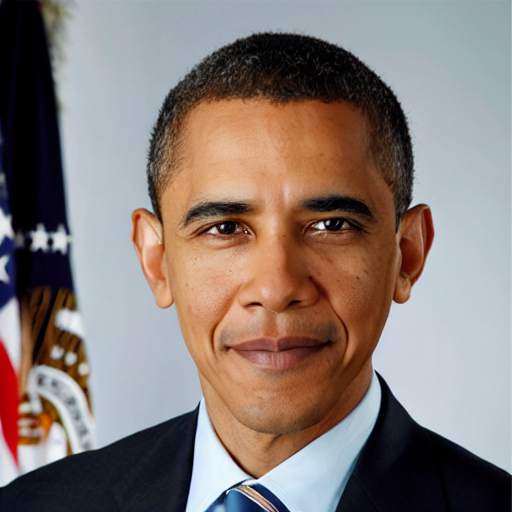

In [9]:
path = './imagic/imagic_image_alpha_1.png'
Image_dis(filename=path) 

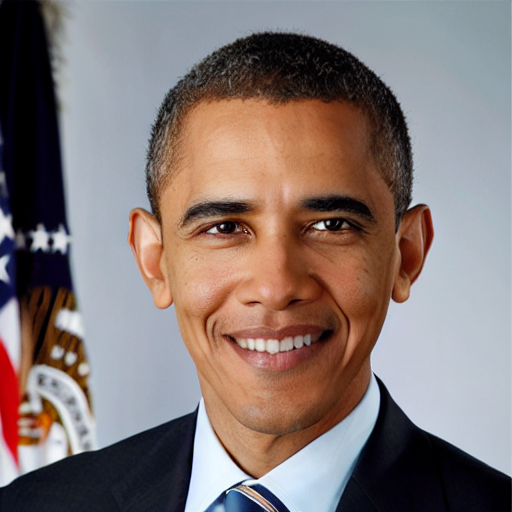

In [10]:
path = './imagic/imagic_image_alpha_1_5.png'
Image_dis(filename=path) 

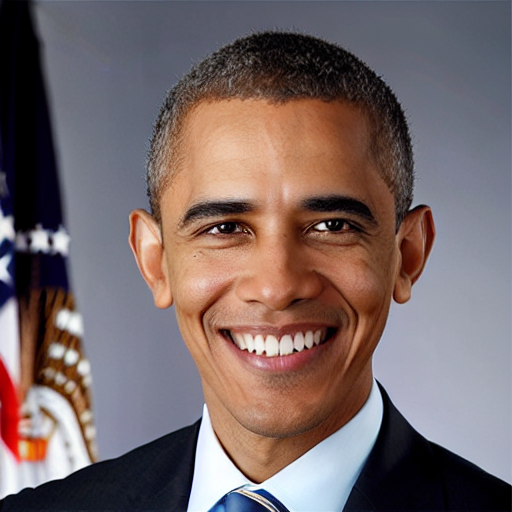

In [11]:
path = './imagic/imagic_image_alpha_2.png'
Image(filename=path) 

In [21]:
prompt = "A person giving the thumbs up"
init_image = Image.open('./imagic/1.png').convert("RGB")
init_image = init_image.resize((512, 512))

res = pipe.train(
        prompt,
        image=init_image,
        generator=generator)

Keyword arguments {'truncaton': True} not recognized.
Steps: 100%|████████████████████████████████████████████████████████████████████████████| 500/500 [01:13<00:00,  6.76it/s, loss=0.458]

100%|███████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:15<00:00,  3.91it/s, loss=0.00215]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 10.23it/s]


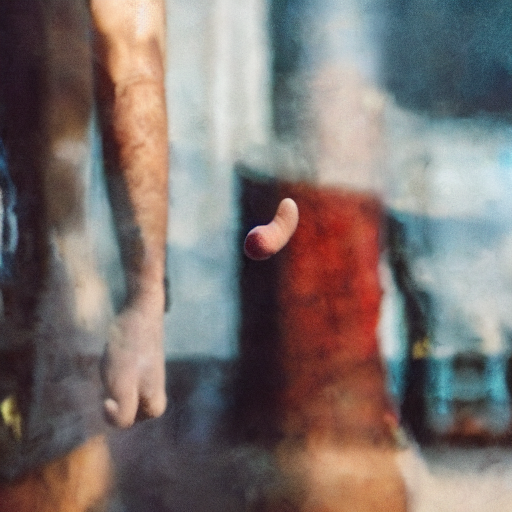

In [23]:
res = pipe(alpha=1, guidance_scale=7.5, num_inference_steps=50)
image = res.images[0]
path = './imagic/imagic_1_1.png'
image.save(path)
Image_dis(filename=path) 